# Warehouse Optimization

## Initilization

In [25]:
import pandas as pd
import numpy as np
data = pd.read_csv('ML_1-6.csv')
data.reset_index(drop=True, inplace=True)
data.dtypes
data.head(10)

,List No,Item No,UPC Code,Manufacturer No,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Product Name,Price(USD),Inventory,STOCK TYPE,Date,In Stock,weight(lb),SaleRate,SaleRateNew
0,3708,CA-CBLP663,6.720000e+11,CBL-PWEX-0663,Supermicro,Power Cable,Component,Cable,Power Cable,Supermicro CBL-PWEX-0663 PCIe 8 pin male (blac...,10.25,1.0,Recurring,01 January 2019,L,1.00,0.0,0.0
1,788,GP-NEXCPKO,NaN,90-XB3TOKSL001P0-,ASUS,Bag & Sleeve,PC & Laptop,Accessory,Bag & Sleeve,ASUS 90-XB3TOKSL001P0- GROUPON Nexus 7 Travel ...,9.23,1.0,Recurring,01 January 2019,L,0.50,0.0,0.0
2,607,FX-832EBOX,7.300000e+11,FD832EWMHKBOX,AMD,Others,Component,CPU / Processor,Desktop CPU,AMD FX-8320E Eight-Core Vishera Processor 3.2G...,76.88,1.0,Recurring,01 January 2019,L,0.74,0.0,0.0
3,138,D318R16GH1,NaN,HMT42GR7BFR4C-RDT,SK hynix,Server DDR3,Component,DRAM Memory,Server DRAM,SK hynix DDR3-1866 16GB/1Gx4 ECC/REG CL13 Hyni...,186.55,1.0,Recurring,01 January 2019,L,0.08,0.0,0.0
4,3461,MB-A1SA25,6.720000e+11,A1SAI-2550F-O,Supermicro,CPU on Board Combo,Component,Motherboard,CPU on Board Combo,Supermicro A1SAI-2550F-O Intel Atom C2550/ DDR...,262.40,1.0,Recurring,01 January 2019,L,5.00,0.0,0.0
5,1631,SC-CENTUR,8.890000e+11,ROG CENTURION 7.1,ASUS,Speaker & Headset,Component,Multimedia,Speaker & Headset,ASUS ROG Centurion True 7.1 Surround Sound Gam...,263.42,1.0,Recurring,01 January 2019,L,6.50,0.0,0.0
6,3924,UPS-RBC57,7.310000e+11,RBC57,APC,Battery Systems,Component,Power Protection / UPS,Battery Systems,APC RBC57 Replacement Battery Cartridge #57,263.94,1.0,Recurring,01 January 2019,L,28.00,0.0,0.0
7,3708,CA-CBLP663,6.720000e+11,CBL-PWEX-0663,Supermicro,Power Cable,Component,Cable,Power Cable,Supermicro CBL-PWEX-0663 PCIe 8 pin male (blac...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8,788,GP-NEXCPKO,NaN,90-XB3TOKSL001P0-,ASUS,Bag & Sleeve,PC & Laptop,Accessory,Bag & Sleeve,ASUS 90-XB3TOKSL001P0- GROUPON Nexus 7 Travel ...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
9,607,FX-832EBOX,7.300000e+11,FD832EWMHKBOX,AMD,Others,Component,CPU / Processor,Desktop CPU,AMD FX-8320E Eight-Core Vishera Processor 3.2G...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## Exploratory Analysis

In [2]:
# get some basic ideas about the data
def summerize_data(df, columns):
    for column in columns:
        print(column)
        if df.dtypes[column] == np.object: # Categorical data
            print(df[column].value_counts())
        else:
            print(df[column].describe())
            
        print('\n')
    
columns = ["Price(USD)", "Inventory", "In Stock", "weight(lb)", "SaleRate", "SaleRateNew"]
summerize_data(data, columns)

Price(USD)
count    4496.000000
mean      272.907547
std       592.651982
min         0.210000
25%        26.650000
50%        81.740000
75%       231.140000
max      7021.250000
Name: Price(USD), dtype: float64


Inventory
count    4496.000000
mean       57.491770
std       114.854261
min         1.000000
25%         5.000000
50%        21.000000
75%        52.000000
max      1002.000000
Name: Inventory, dtype: float64


In Stock
Y    3330
L     870
Name: In Stock, dtype: int64


weight(lb)
count    4198.000000
mean        6.475088
std        13.761894
min         0.000000
25%         0.350000
50%         1.545000
75%         5.490000
max       174.000000
Name: weight(lb), dtype: float64


SaleRate
count    8400.000000
mean        0.638946
std         0.273979
min         0.000000
25%         0.471910
50%         0.747191
75%         0.839462
max         0.981273
Name: SaleRate, dtype: float64


SaleRateNew
count    8400.000000
mean        0.913433
std         1.138067
min         0.0

# Missing Data Points Per Feature

In [3]:
data.isnull().sum()

List No               0
Item No               0
UPC Code           1204
Manufacturer No       0
Manufacturer          0
Category              2
Category Path 1       2
Category Path 2       2
Category Path 3     592
Product Name          0
Price(USD)         3904
Inventory          3904
STOCK TYPE         4200
Date               4200
In Stock           4200
weight(lb)         4202
SaleRate              0
SaleRateNew           0
dtype: int64

## Graphs

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline

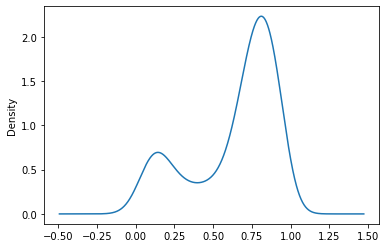

In [5]:
data["SaleRate"].plot.kde(bw_method=0.3)

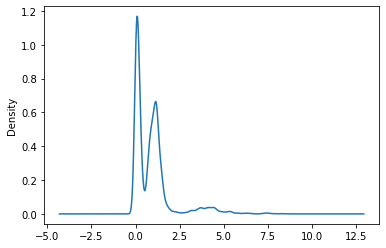

In [6]:
data["SaleRateNew"].plot.kde(bw_method=0.1)

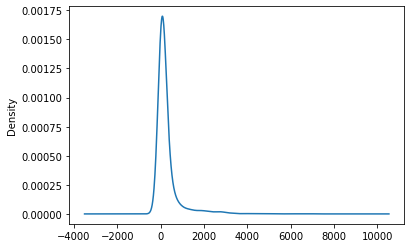

In [7]:
data["Price(USD)"].plot.kde(bw_method=0.3)

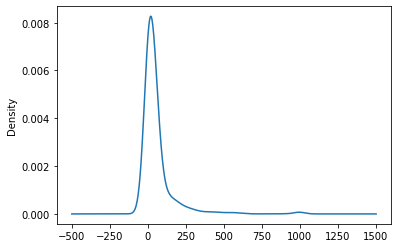

In [8]:
data["Inventory"].plot.kde(bw_method=0.3)

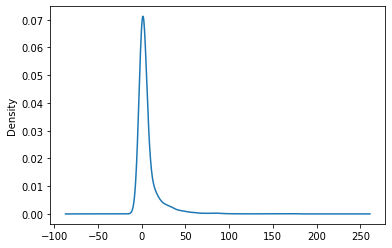

In [9]:
data[ "weight(lb)"].plot.kde(bw_method=0.3)

## corelation matrix

,List No,UPC Code,Price(USD),Inventory,weight(lb),SaleRate,SaleRateNew
List No,1.000000,0.128182,-0.031716,-0.055338,0.123962,-0.082561,-0.160238
UPC Code,0.128182,1.000000,-0.043383,0.013436,0.010606,0.007696,0.022284
Price(USD),-0.031716,-0.043383,1.000000,-0.117065,0.523908,-0.037775,-0.107556
Inventory,-0.055338,0.013436,-0.117065,1.000000,-0.110227,-0.195280,0.546154
weight(lb),0.123962,0.010606,0.523908,-0.110227,1.000000,-0.119042,-0.141499
SaleRate,-0.082561,0.007696,-0.037775,-0.195280,-0.119042,1.000000,0.300731
SaleRateNew,-0.160238,0.022284,-0.107556,0.546154,-0.141499,0.300731,1.000000


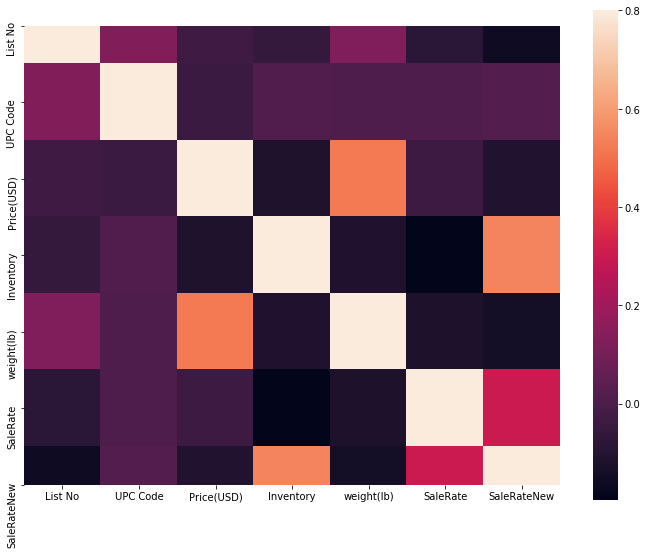

In [10]:
#correlation matrix
import seaborn as sns
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
corrmat

# Relationship with categorical values

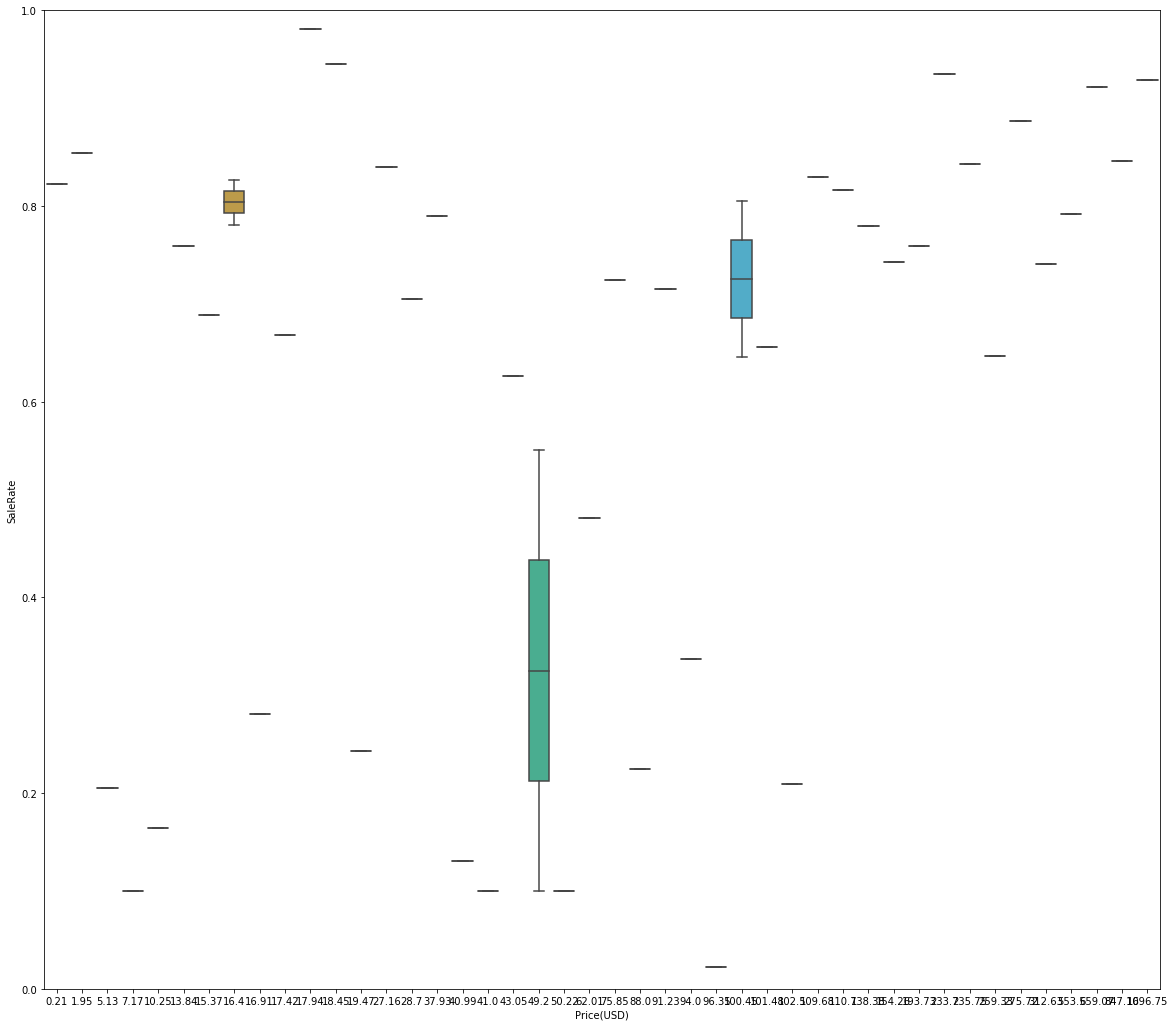

In [35]:
#box plot overallqual/saleprice
box_plot_df = data.sample(n=100, random_state=1)
var = 'Price(USD)'
box_plot_df = pd.concat([box_plot_df['SaleRate'], box_plot_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 18))
fig = sns.boxplot(x=var, y="SaleRate", data=box_plot_df)
fig.axis(ymin=0, ymax=1);

In [75]:
import pandas_profiling as pp

#check profile report of the dataset

profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="EDA.html")

ModuleNotFoundError: No module named 'pandas_profiling'

# Model

In [18]:
X = data.drop('SaleRateNew', axis=1)
y = data['SaleRateNew']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [19]:
len(data['Category'].unique())

188

In [30]:
# limit to categorical data using df.select_dtypes()
#data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock'], axis=1)
X = data.select_dtypes(include=[object])
X = X.replace(np.nan, 'Default', regex=True)
X.head(30)

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3
0,Supermicro,Power Cable,Component,Cable,Power Cable
1,ASUS,Bag & Sleeve,PC & Laptop,Accessory,Bag & Sleeve
2,AMD,Others,Component,CPU / Processor,Desktop CPU
3,SK hynix,Server DDR3,Component,DRAM Memory,Server DRAM
4,Supermicro,CPU on Board Combo,Component,Motherboard,CPU on Board Combo
5,ASUS,Speaker & Headset,Component,Multimedia,Speaker & Headset
6,APC,Battery Systems,Component,Power Protection / UPS,Battery Systems
7,Supermicro,Power Cable,Component,Cable,Power Cable
8,ASUS,Bag & Sleeve,PC & Laptop,Accessory,Bag & Sleeve
9,AMD,Others,Component,CPU / Processor,Desktop CPU


In [33]:
from sklearn import preprocessing
X.reset_index(drop=True, inplace=True)
le = preprocessing.LabelEncoder()
X_2 = X.apply(le.fit_transform)
X_2.head(10)

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3
0,98,129,0,5,66
1,6,32,4,0,2
2,1,126,0,4,22
3,87,146,0,11,81
4,98,39,0,22,8
5,6,162,0,23,85
6,2,34,0,27,4
7,98,129,0,5,66
8,6,32,4,0,2
9,1,126,0,4,22
